# Binary classification based on 3 layers neural network

- This is given by Professor

In [2]:
import torch
from torch.utils.data import Dataset, DataLoader
import torchvision.transforms as transforms
from torch.autograd import Variable
import torchvision
import os
import sys

from scipy.special import xlogy

import matplotlib.pyplot as plt
import numpy as np
import time


transform = transforms.Compose([#transforms.Resize((256,256)),  
                                transforms.Grayscale(),		# the code transforms.Graysclae() is for changing the size [3,100,100] to [1, 100, 100] (notice : [channel, height, width] )
                                transforms.ToTensor(),])

 
#train_data_path = 'relative path of training data set'
train_data_path = 'C:\\Users\\newmi\\OneDrive\\바탕 화면\\horse-or-human\\horse-or-human\\train'
trainset = torchvision.datasets.ImageFolder(root=train_data_path, transform=transform)
# change the valuse of batch_size, num_workers for your program
# if shuffle=True, the data reshuffled at every epoch 
trainloader = torch.utils.data.DataLoader(trainset, batch_size=1, shuffle=False, num_workers=1)  


validation_data_path = 'C:\\Users\\newmi\\OneDrive\\바탕 화면\\horse-or-human\\horse-or-human\\validation'
valset = torchvision.datasets.ImageFolder(root=validation_data_path, transform=transform)
# change the valuse of batch_size, num_workers for your program
valloader = torch.utils.data.DataLoader(valset, batch_size=1, shuffle=False, num_workers=1)  


- This is given by Professor

In [3]:
train_labels=np.zeros(1027)
test_labels=np.zeros(256)

train_datas=np.zeros((1027,10000))
test_datas=np.zeros((256,10000))



for epoch in range(1):
    sum=0
    # load training images of the batch size for every iteration
    for i, data in enumerate(trainloader):

        inputs, labels = data
        train_labels[i]=int(labels)
        reinputs=inputs.reshape(10000)
        reinputs=np.array(reinputs)
        train_datas[i]=reinputs
        
    train_datas=train_datas.T

    for i, data in enumerate(valloader):
        sum+=1
        inputs, labels = data
        test_labels[i]=int(labels)
        reinputs=inputs.reshape(10000)
        reinputs=np.array(reinputs)
        test_datas[i]=reinputs

    test_datas=test_datas.T

        
    
    

- Calculating accuracy

In [978]:
def accuracy_func(h_,label):
    correct=0
    for i in range(len(label)):
        if(h_[i]<0.5 and label[i]==0):
            correct+=1
        elif(h_[i]>=0.5 and label[i]==1):
            correct+=1
    total= correct/len(label)
    
    return total

np.set_printoptions(threshold=sys.maxsize)

## Bias: When Lamda is too big (Underfitting)

In [1159]:
NUM_EPOCH=1000000

total_loss=np.zeros(NUM_EPOCH)
total_loss_test=np.zeros(NUM_EPOCH)

accuracy=np.zeros(NUM_EPOCH)
accuracy_test=np.zeros(NUM_EPOCH)

#known_data is weight sets.
known_data1=np.random.randn(10000,10)*0.1
known_data2=np.random.randn(10,3)*0.1
known_data3=np.random.randn(3,1)*0.1

b_1=np.random.randn(10,1)*0.1
b_2=np.random.randn(3,1)*0.1
b_3=np.random.randn(1,1)*0.1


In [1160]:
l_rate=0.2
j=0

lamd=4.0

#Vertorizing Logistic Regression'c gradient Computation in 3 Layers
for i in range(NUM_EPOCH):
    
    #Forward propagation for train_set
    z1=np.dot(known_data1.T,train_datas)+b_1 #10x1027 =a
    A1=1.0/(1+np.exp(-z1)) 
    z2=np.dot(known_data2.T,A1)+b_2 #3x1027=b
    A2=1.0/(1+np.exp(-z2))
    z3=np.dot(known_data3.T,A2)+b_3 #1x1027=c
    A3=1.0/(1+np.exp(-z3))
    
    
    #Forward propagation for validation_set
    z1_v=np.dot(known_data1.T,test_datas)+b_1 #10x256=a
    A1_v=1.0/(1+np.exp(-z1_v)) 
    z2_v=np.dot(known_data2.T,A1_v)+b_2 #3x256=b
    A2_v=1.0/(1+np.exp(-z2_v))
    z3_v=np.dot(known_data3.T,A2_v)+b_3 #1x256=c
    A3_v=1.0/(1+np.exp(-z3_v))
    
    #Calculating total cost
    pre_j==j
    j=-(xlogy(train_labels,A3)+xlogy(1-train_labels,1-A3)).sum()/1027 + ((lamd/2)*((known_data1*known_data1).sum()+
                      (known_data2*known_data2).sum()+(known_data1*known_data1).sum()))/1027
    j_v=-(xlogy(test_labels,A3_v)+xlogy(1-test_labels,1-A3_v)).sum()/256 + ((lamd/2)*((known_data1*known_data1).sum()+
                      (known_data2*known_data2).sum()+(known_data1*known_data1).sum()))/256
    
    #Calculating Accuracy
    A3=A3.reshape(1027)
    accuracy[i]=accuracy_func(A3,train_labels)  
    A3_v=A3_v.reshape(256)
    accuracy_test[i]=accuracy_func(A3_v,test_labels)
    
    #Stop the iteration if train sets converge.
    if(pre_j==j):
        NUM_EPOCH=i+1
        break    
    
    A3=A3.reshape(1,1027)
    A3_v=A3_v.reshape(1,256)
    
    #Backpropagation 
    L_3=A3-train_labels #1027
    L_3=L_3.reshape(1,1027)
    L_2=np.dot(known_data3,L_3)*((1-A2)*A2)  
    L_1=np.dot(known_data2,L_2)*((1-A1)*A1) #10x1027
    
    #Backpropagation first-layer
    dL_3=np.dot(A2,L_3.T)/1027
    known_data3-=l_rate*(dL_3+(lamd/1027)*known_data3)
    b3=np.sum(L_3,axis=1,keepdims=True)/1027
    
    #Backpropagation second-layer
    dL_2=np.dot(A1,L_2.T)/1027
    known_data2-=l_rate*(dL_2+(lamd/1027)*known_data2)
    b2=np.sum(L_2,axis=1,keepdims=True)/1027
    
    #Backpropagation third-layer
    dL_1=np.dot(train_datas,L_1.T)/1027
    known_data1-=l_rate*(dL_1+(lamd/1027)*known_data1)
    b1=np.sum(L_1,axis=1,keepdims=True)/1027

    
    

- Plot the loss of Train and Validation at every iteration

Text(0.5, 0, 'Iteraion')

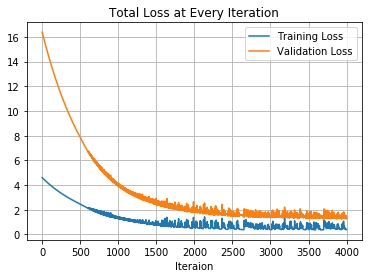

In [1064]:
plt.plot(total_loss,label='Training Loss')
plt.plot(total_loss_test,label='Validation Loss')
#plt.ylim([0,1.2])
plt.grid()
plt.legend(loc='upper right')
plt.title("Total Loss at Every Iteration")
plt.xlabel("Iteraion")

- Plot the Accuracy of Train and Validation 

Text(0.5, 0, 'Iteraion')

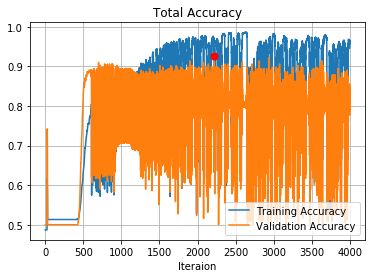

In [1065]:
max_index=np.argmax(accuracy_test)
plt.plot(accuracy,label='Training Accuracy')
plt.plot(accuracy_test,label='Validation Accuracy')
plt.legend(loc='lower right')
plt.grid()
plt.scatter(max_index,accuracy_test[max_index],c='r',s=50,label='Best accuracy',zorder=10)
plt.title("Total Accuracy")
plt.xlabel("Iteraion")

In [1066]:
max_index=np.argmax(accuracy_test)
print("""
                           <At convergence>
+-----------------------------+-----------------------+--------------------+
|       At convergence        |          Loss         |      Accuracy      |
+-----------------------------+-----------------------+--------------------+
|       Training              |         %6.3f        |      %6.2f %%      |
+-----------------------------+-----------------------+--------------------+
|      Validation             |         %6.3f        |      %6.2f %%      |
+-----------------------------+-----------------------+--------------------+

                  <When the best validation accuracy>
+-----------------------+------------------------+
|       Data set        |      Best  Accuracy    |
+-----------------------+------------------------+
|     Validation        |         %6.2f %%       |
+-----------------------+------------------------+"""
%(total_loss[NUM_EPOCH-1],accuracy[NUM_EPOCH-1]*100,total_loss_test[NUM_EPOCH-1],accuracy_test[NUM_EPOCH-1]*100,np.max(accuracy_test)*100))


                           <At convergence>
+-----------------------------+-----------------------+--------------------+
|       At convergence        |          Loss         |      Accuracy      |
+-----------------------------+-----------------------+--------------------+
|       Training              |          0.411        |       94.64 %      |
+-----------------------------+-----------------------+--------------------+
|      Validation             |          1.282        |       85.55 %      |
+-----------------------------+-----------------------+--------------------+

                  <When the best validation accuracy>
+-----------------------+------------------------+
|       Data set        |      Best  Accuracy    |
+-----------------------+------------------------+
|     Validation        |          92.58 %       |
+-----------------------+------------------------+


## Variance: When Lamda is too small  (Overfitting)

- Initialization Train and Validation set.

In [962]:
NUM_EPOCH=1000000

total_loss=np.zeros(NUM_EPOCH)
total_loss_test=np.zeros(NUM_EPOCH)

accuracy=np.zeros(NUM_EPOCH)
accuracy_test=np.zeros(NUM_EPOCH)

#known_data is weight sets.
known_data1=np.random.randn(10000,10)*0.1
known_data2=np.random.randn(10,3)*0.1
known_data3=np.random.randn(3,1)*0.1

b_1=np.random.randn(10,1)*0.1
b_2=np.random.randn(3,1)*0.1
b_3=np.random.randn(1,1)*0.1


In [963]:
l_rate=0.2
j=0

lamd=0.0000000001

#Vertorizing Logistic Regression'c gradient Computation in 3 Layers
for i in range(NUM_EPOCH):
    
    #Forward propagation for train_set
    z1=np.dot(known_data1.T,train_datas)+b_1 #10x1027 =a
    A1=1.0/(1+np.exp(-z1)) 
    z2=np.dot(known_data2.T,A1)+b_2 #3x1027=b
    A2=1.0/(1+np.exp(-z2))
    z3=np.dot(known_data3.T,A2)+b_3 #1x1027=c
    A3=1.0/(1+np.exp(-z3))
    
    
    #Forward propagation for validation_set
    z1_v=np.dot(known_data1.T,test_datas)+b_1 #10x256=a
    A1_v=1.0/(1+np.exp(-z1_v)) 
    z2_v=np.dot(known_data2.T,A1_v)+b_2 #3x256=b
    A2_v=1.0/(1+np.exp(-z2_v))
    z3_v=np.dot(known_data3.T,A2_v)+b_3 #1x256=c
    A3_v=1.0/(1+np.exp(-z3_v))
    
    #Calculating total cost
    pre_j==j
    j=-(xlogy(train_labels,A3)+xlogy(1-train_labels,1-A3)).sum()/1027+ ((lamd/2)*((known_data1*known_data1).sum()+
                      (known_data2*known_data2).sum()+(known_data1*known_data1).sum()))/1027
    j_v=-(xlogy(test_labels,A3_v)+xlogy(1-test_labels,1-A3_v)).sum()/256+ ((lamd/2)*((known_data1*known_data1).sum()+
                      (known_data2*known_data2).sum()+(known_data1*known_data1).sum()))/256
    
    
    total_loss[i]=j  
    total_loss_test[i]=j_v
    
    #Calculating Accuracy
    A3=A3.reshape(1027)
    accuracy[i]=accuracy_func(A3,train_labels)
    
    A3_v=A3_v.reshape(256)
    accuracy_test[i]=accuracy_func(A3_v,test_labels)
    
    
    #Stop the iteration if train sets converge.
    if(pre_j==j):
        NUM_EPOCH=i+1
        break    
        
    A3=A3.reshape(1,1027)
    A3_v=A3_v.reshape(1,256)
    
    #Backpropagation 
    L_3=A3-train_labels #1027
    L_3=L_3.reshape(1,1027)
    L_2=np.dot(known_data3,L_3)*((1-A2)*A2) 
    L_1=np.dot(known_data2,L_2)*((1-A1)*A1) #10x1027
    
    #Backpropagation first-layer
    dL_3=np.dot(A2,L_3.T)/1027
    known_data3= (1-(l_rate*lamd)/1027)*known_data3-l_rate*dL_3
    b3=np.sum(L_3,axis=1,keepdims=True)/1027
    
    #Backpropagation second-layer
    dL_2=np.dot(A1,L_2.T)/1027
    known_data2= (1-(l_rate*lamd)/1027)*known_data2-l_rate*dL_2
    b2=np.sum(L_2,axis=1,keepdims=True)/1027
    
    #Backpropagation third-layer
    dL_1=np.dot(train_datas,L_1.T)/1027
    known_data1= (1-(l_rate*lamd)/1027)*known_data1-l_rate*dL_1
    b1=np.sum(L_1,axis=1,keepdims=True)/1027

    
    

- Plot the loss of Train and Validation at every iteration

Text(0.5, 0, 'Iteraion')

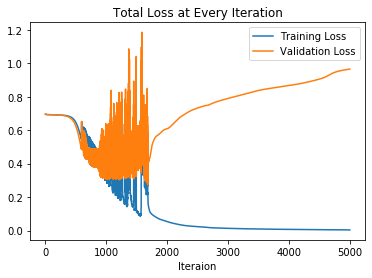

In [964]:
plt.plot(total_loss,label='Training Loss')
plt.plot(total_loss_test,label='Validation Loss')
plt.legend(loc='upper right')
plt.title("Total Loss at Every Iteration")
plt.xlabel("Iteraion")

- Plot the Accuracy of Train and Validation 

Text(0.5, 0, 'Iteraion')

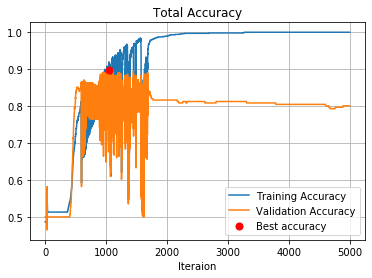

In [970]:
max_index=np.argmax(accuracy_test)
plt.plot(accuracy,label='Training Accuracy')
plt.plot(accuracy_test,label='Validation Accuracy')
plt.scatter(max_index,accuracy_test[max_index],c='r',s=50,zorder=10,label='Best accuracy')
plt.legend(loc='lower right')
plt.grid()
plt.title("Total Accuracy")
plt.xlabel("Iteraion")

In [966]:
max_index=np.argmax(accuracy_test)
print("""
                           <At convergence>
+-----------------------------+-----------------------+--------------------+
|       At convergence        |          Loss         |      Accuracy      |
+-----------------------------+-----------------------+--------------------+
|       Training              |         %6.3f        |      %6.2f %%      |
+-----------------------------+-----------------------+--------------------+
|      Validation             |         %6.3f        |      %6.2f %%      |
+-----------------------------+-----------------------+--------------------+

                  <When the best validation accuracy>
+-----------------------+------------------------+
|       Data set        |      Best  Accuracy    |
+-----------------------+------------------------+
|     Validation        |         %6.2f %%       |
+-----------------------+------------------------+"""
%(total_loss[NUM_EPOCH-1],accuracy[NUM_EPOCH-1]*100,total_loss_test[NUM_EPOCH-1],accuracy_test[NUM_EPOCH-1]*100,np.max(accuracy_test)*100))


                           <At convergence>
+-----------------------------+-----------------------+--------------------+
|       At convergence        |          Loss         |      Accuracy      |
+-----------------------------+-----------------------+--------------------+
|       Training              |          0.004        |      100.00 %      |
+-----------------------------+-----------------------+--------------------+
|      Validation             |          0.965        |       80.08 %      |
+-----------------------------+-----------------------+--------------------+

                  <When the best validation accuracy>
+-----------------------+------------------------+
|       Data set        |      Best  Accuracy    |
+-----------------------+------------------------+
|     Validation        |          89.84 %       |
+-----------------------+------------------------+


## Best Generalization: When Lamda is appropriate

- Initialization Train and Validation set.

In [1167]:
NUM_EPOCH=1000000

total_loss=np.zeros(NUM_EPOCH)
total_loss_test=np.zeros(NUM_EPOCH)

accuracy=np.zeros(NUM_EPOCH)
accuracy_test=np.zeros(NUM_EPOCH)

#known_data is weight sets.
known_data1=np.random.randn(10000,10)
known_data2=np.random.randn(10,3)
known_data3=np.random.randn(3,1)

b_1=np.random.randn(10,1)
b_2=np.random.randn(3,1)
b_3=np.random.randn(1,1)

- Optimization in 3 Layers
- Vertorizing Logistic Regression'c gradient Computation in 3 Layers
- Neural Network Representations
- known_data1 => 10000 x 10 , known_data2 => 10 x 3 ,known_data3 => 3 x 1

In [1168]:
l_rate=0.085
j=0

lamd=10

#Vertorizing Logistic Regression'c gradient Computation in 3 Layers
for i in range(NUM_EPOCH):
    
    #Forward propagation for train_set
    z1=np.dot(known_data1.T,train_datas)+b_1 #10x1027 =a
    A1=1.0/(1+np.exp(-z1)) 
    z2=np.dot(known_data2.T,A1)+b_2 #3x1027=b
    A2=1.0/(1+np.exp(-z2))
    z3=np.dot(known_data3.T,A2)+b_3 #1x1027=c
    A3=1.0/(1+np.exp(-z3))
    
    
    #Forward propagation for validation_set
    z1_v=np.dot(known_data1.T,test_datas)+b_1 #10x256=a
    A1_v=1.0/(1+np.exp(-z1_v)) 
    z2_v=np.dot(known_data2.T,A1_v)+b_2 #3x256=b
    A2_v=1.0/(1+np.exp(-z2_v))
    z3_v=np.dot(known_data3.T,A2_v)+b_3 #1x256=c
    A3_v=1.0/(1+np.exp(-z3_v))
    
    #Calculating total cost
    pre_j==j
    j= -(xlogy(train_labels,A3)+xlogy(1-train_labels,1-A3)).sum()/1027+((lamd/2)*((known_data1*known_data1).sum()+
                      (known_data2*known_data2).sum()+(known_data1*known_data1).sum()))/1027
    j_v= -(xlogy(test_labels,A3_v)+xlogy(1-test_labels,1-A3_v)).sum()/256+((lamd/2)*((known_data1*known_data1).sum()+
                      (known_data2*known_data2).sum()+(known_data1*known_data1).sum()))/256
    
    
    total_loss[i]=j 
    total_loss_test[i]=j_v
    
    #Calculating Accuracy
    A3=A3.reshape(1027)
    accuracy[i]=accuracy_func(A3,train_labels)  
    A3_v=A3_v.reshape(256)
    accuracy_test[i]=accuracy_func(A3_v,test_labels)
    
    
    #Stop the iteration if train sets converge.
    if(pre_j==j):
        NUM_EPOCH=i+1
        break    
        
    A3=A3.reshape(1,1027)
    A3_v=A3_v.reshape(1,256)
    
    #Backpropagation 
    L_3=A3-train_labels #1027
    L_3=L_3.reshape(1,1027)
    L_2=np.dot(known_data3,L_3)*((1-A2)*A2) 
    L_1=np.dot(known_data2,L_2)*((1-A1)*A1) #10x1027
    
    #Backpropagation first-layer
    dL_3=np.dot(A2,L_3.T)/1027
    known_data3= (1-(l_rate*lamd)/1027)*known_data3-l_rate*dL_3
    b3=np.sum(L_3,axis=1,keepdims=True)/1027
    
    #Backpropagation second-layer
    dL_2=np.dot(A1,L_2.T)/1027
    known_data2= (1-(l_rate*lamd)/1027)*known_data2-l_rate*dL_2 
    b2=np.sum(L_2,axis=1,keepdims=True)/1027
    
    #Backpropagation third-layer
    dL_1=np.dot(train_datas,L_1.T)/1027
    known_data1= (1-(l_rate*lamd)/1027)*known_data1-l_rate*dL_1
    b1=np.sum(L_1,axis=1,keepdims=True)/1027

    

- Plot the loss of Train and Validation at every iteration

Text(0.5, 0, 'Iteraion')

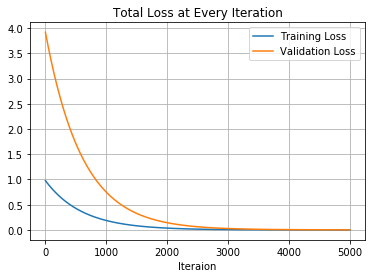

In [1169]:
plt.plot(total_loss,label='Training Loss')
plt.plot(total_loss_test,label='Validation Loss')
plt.grid()
plt.legend(loc='upper right')
plt.title("Total Loss at Every Iteration")
plt.xlabel("Iteraion")

- Plot the Accuracy of Train and Validation 

Text(0.5, 0, 'Iteraion')

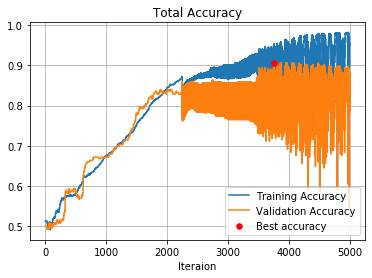

In [1183]:
max_index=np.argmax(accuracy_test)
plt.scatter(max_index,accuracy_test[max_index],c='r',s=30,zorder=3,label='Best accuracy')
plt.plot(accuracy,label='Training Accuracy')
plt.plot(accuracy_test,label='Validation Accuracy')
plt.grid()
plt.legend(loc='lower right')
plt.title("Total Accuracy")
plt.xlabel("Iteraion")

In [1189]:
max_index=np.argmax(accuracy_test)
print("""
                           <At convergence>
+-----------------------------+-----------------------+--------------------+
|       At convergence        |          Loss         |      Accuracy      |
+-----------------------------+-----------------------+--------------------+
|       Training              |         %6.3f        |      %6.2f %%      |
+-----------------------------+-----------------------+--------------------+
|      Validation             |         %6.3f        |      %6.2f %%      |
+-----------------------------+-----------------------+--------------------+

                  <When the best validation accuracy>
+-----------------------+------------------------+
|       Data set        |      Best  Accuracy    |
+-----------------------+------------------------+
|     Validation        |         %6.2f %%       |
+-----------------------+------------------------+"""
%(total_loss[NUM_EPOCH-1],accuracy[NUM_EPOCH-2]*100,total_loss_test[NUM_EPOCH-1],accuracy_test[NUM_EPOCH-1]*100,np.max(accuracy_test)*100))


                           <At convergence>
+-----------------------------+-----------------------+--------------------+
|       At convergence        |          Loss         |      Accuracy      |
+-----------------------------+-----------------------+--------------------+
|       Training              |          0.011        |       98.62 %      |
+-----------------------------+-----------------------+--------------------+
|      Validation             |          0.019        |       90.77 %      |
+-----------------------------+-----------------------+--------------------+

                  <When the best validation accuracy>
+-----------------------+------------------------+
|       Data set        |      Best  Accuracy    |
+-----------------------+------------------------+
|     Validation        |          92.62 %       |
+-----------------------+------------------------+


# Summary:
- Bias Training converge loss is bigger than others.
- Accuracy is not decreasing in Best Lamda iterations.
- Accuracy is the best when Lamda is appropriate.


In [1191]:
print("""

<At convergence>
+-------------------------+----------+---------------+-------------------+
|       At convergence    |    Bias  |   Variance    |     Best Lamda    | 
+-------------------------+----------+---------------+-------------------+
|       Training Loss     |   0.411  |     0.004     |      0.011        |
+-------------------------+----------+---------------+-------------------+
|       Test Accuracy     |   85.55% |    80.08%     |      90.77%       |
+-------------------------+----------+---------------+-------------------+

""")



<At convergence>
+-------------------------+----------+---------------+-------------------+
|       At convergence    |    Bias  |   Variance    |     Best Lamda    | 
+-------------------------+----------+---------------+-------------------+
|       Training Loss     |   0.411  |     0.004     |      0.011        |
+-------------------------+----------+---------------+-------------------+
|       Test Accuracy     |   85.55% |    80.08%     |      90.77%       |
+-------------------------+----------+---------------+-------------------+


